In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

### WHO Data

In [3]:
# Import data
df = pd.read_csv('./who_maternal_mortality.csv')

In [4]:
df= df[df["Country"]=="World"]

In [5]:
df_transform = pd.melt(df, id_vars='Country', value_vars=df.columns[1:]).rename(columns={"variable":"year"})

In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_transform.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -15.415964
p-value: 0.000000


In [7]:
result = adfuller(df_transform.value.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -15.415963751528059
n_lags: 3.0791373458812974e-28
p-value: 3.0791373458812974e-28
Critial Values:
   1%, -4.331573
Critial Values:
   5%, -3.23295
Critial Values:
   10%, -2.7487


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is lower than any of the critical values.

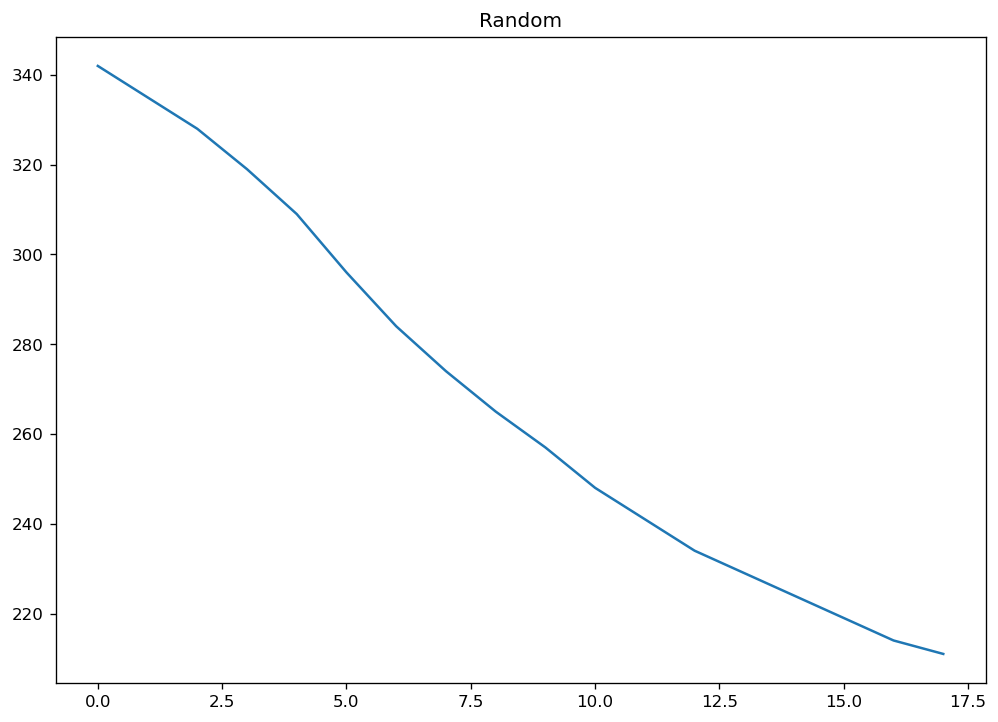

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(figsize=(10,7))
plt.plot(df_transform.value.dropna());
plt.title('Random');

visualizing the series shows that it is not stationary

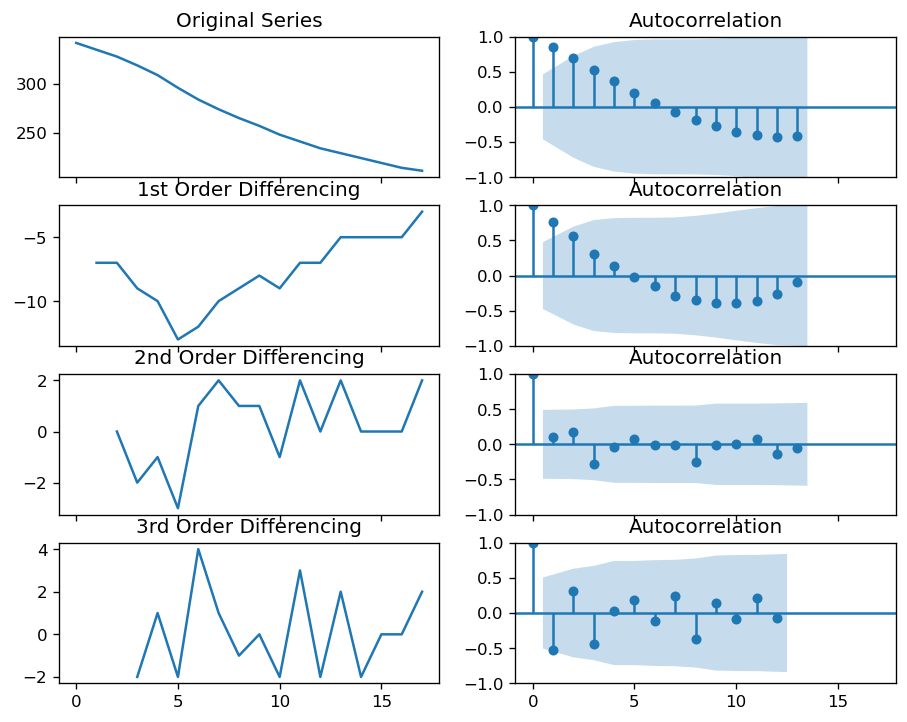

In [9]:
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df_transform.value); axes[0, 0].set_title('Original Series')
plot_acf(df_transform.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_transform.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_transform.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_transform.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_transform.value.diff().diff().dropna(), ax=axes[2, 1])


# 3rd Differencing
axes[3, 0].plot(df_transform.value.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df_transform.value.diff().diff().diff().dropna(), ax=axes[3, 1])
plt.show()

#### Finding AR Term

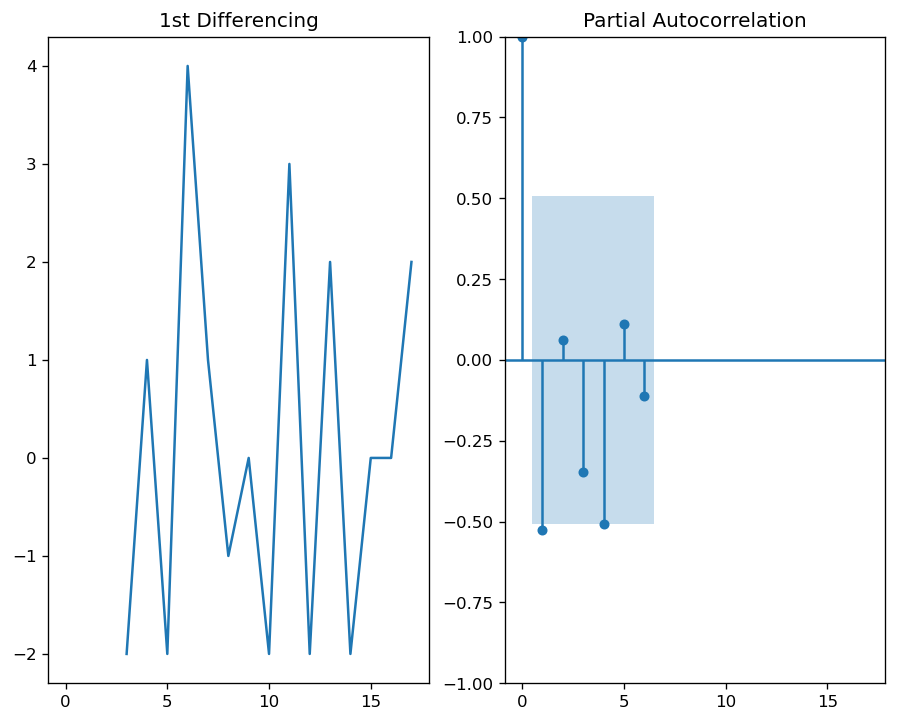

In [10]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_transform.value.diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_transform.value.diff().diff().diff().dropna(), ax=axes[1], method='ywm', lags=6)
plt.show()

0 and 1 are above the significant lines, so p can be 1

#### Finding MA Term

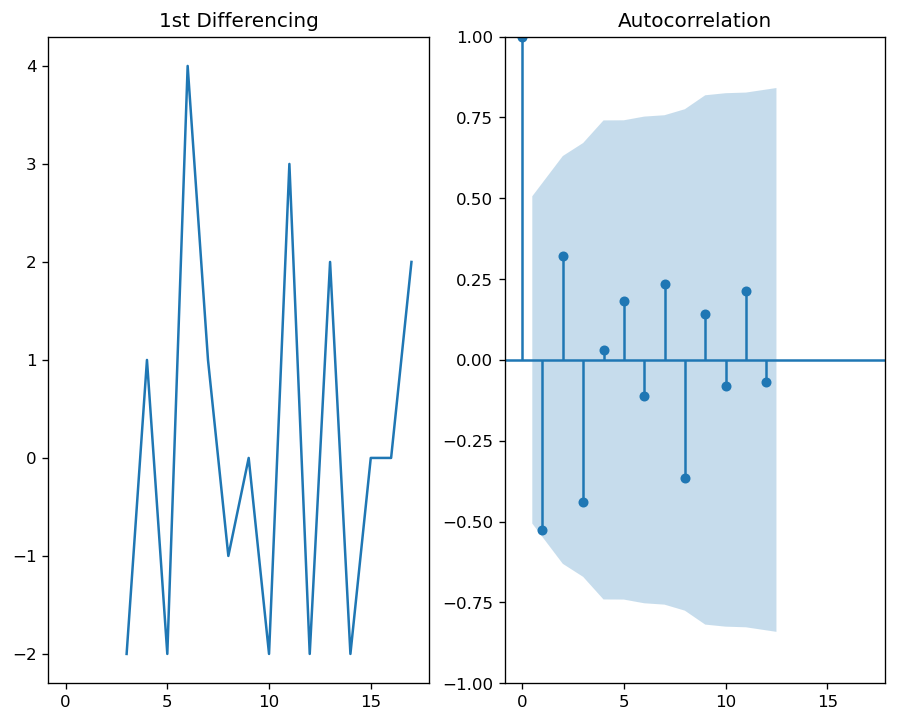

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_transform.value.diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_transform.value.diff().diff().diff().dropna(), ax=axes[1])

plt.show()

Only 0 is well above the significan line, hence q = 1

In [12]:
df_transform.index = pd.date_range(start='2000', end='2018', freq='A')

In [13]:
# 1,1,1 ARIMA Model (p,d,q)
model = ARIMA(df_transform.value, order=(0,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   18
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -28.733
Date:                Sun, 20 Nov 2022   AIC                             59.466
Time:                        04:29:09   BIC                             60.239
Sample:                    12-31-2000   HQIC                            59.506
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.1250      0.933      2.278      0.023       0.297       3.953
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.65   Pr

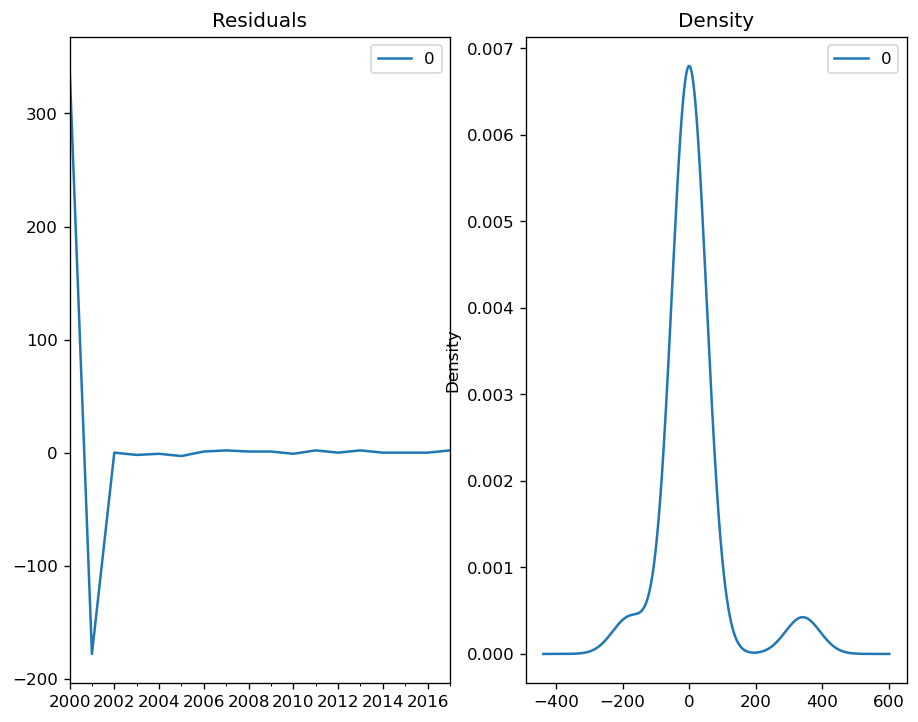

In [14]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

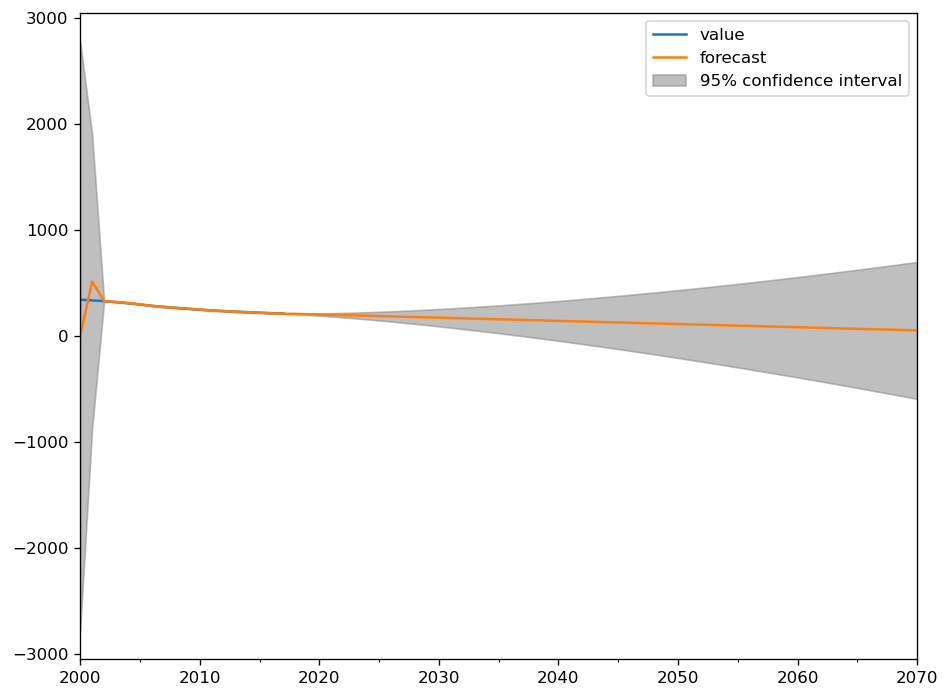

In [15]:
fig, ax = plt.subplots()
ax = df_transform.plot(ax=ax)
ge = plot_predict(model_fit, '2000', '2070', ax=ax)

plt.show()

In [16]:
forecast = model_fit.predict(start='2018', end='2070')
print(forecast)

2018-12-31    208.0
2019-12-31    205.0
2020-12-31    202.0
2021-12-31    199.0
2022-12-31    196.0
2023-12-31    193.0
2024-12-31    190.0
2025-12-31    187.0
2026-12-31    184.0
2027-12-31    181.0
2028-12-31    178.0
2029-12-31    175.0
2030-12-31    172.0
2031-12-31    169.0
2032-12-31    166.0
2033-12-31    163.0
2034-12-31    160.0
2035-12-31    157.0
2036-12-31    154.0
2037-12-31    151.0
2038-12-31    148.0
2039-12-31    145.0
2040-12-31    142.0
2041-12-31    139.0
2042-12-31    136.0
2043-12-31    133.0
2044-12-31    130.0
2045-12-31    127.0
2046-12-31    124.0
2047-12-31    121.0
2048-12-31    118.0
2049-12-31    115.0
2050-12-31    112.0
2051-12-31    109.0
2052-12-31    106.0
2053-12-31    103.0
2054-12-31    100.0
2055-12-31     97.0
2056-12-31     94.0
2057-12-31     91.0
2058-12-31     88.0
2059-12-31     85.0
2060-12-31     82.0
2061-12-31     79.0
2062-12-31     76.0
2063-12-31     73.0
2064-12-31     70.0
2065-12-31     67.0
2066-12-31     64.0
2067-12-31     61.0


### IHME Data

In [17]:
# Import data
df = pd.read_csv('./ihme_2022_maternal_mortality.csv')

In [18]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.248078
p-value: 0.189261


#### Finding Difference Order

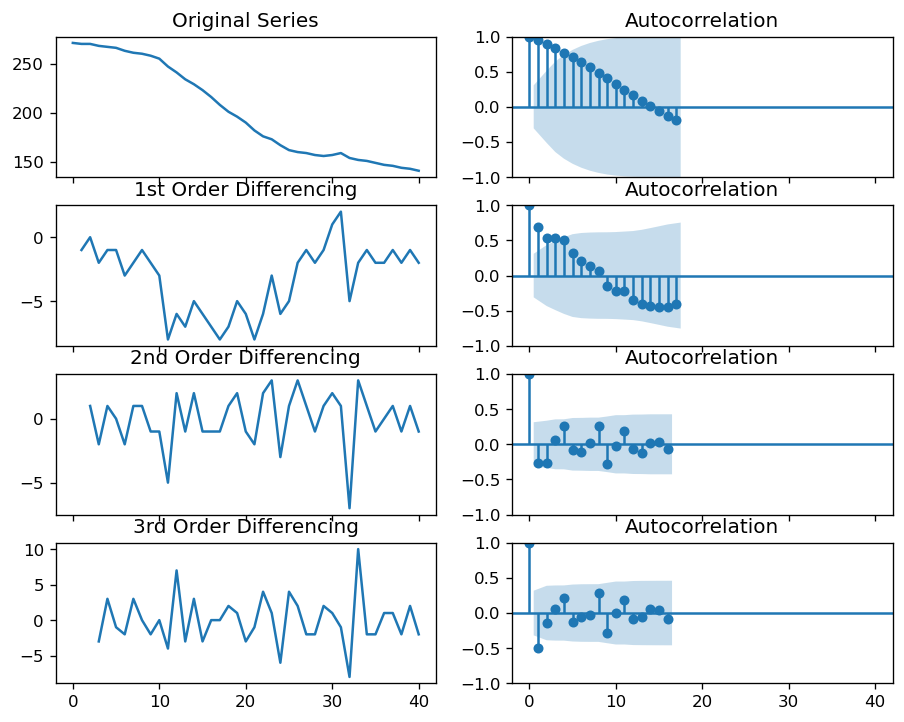

In [19]:
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])


# 3rd Differencing
axes[3, 0].plot(df.value.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.value.diff().diff().diff().dropna(), ax=axes[3, 1])
plt.show()

<b>We can see that the differencing of order 2 is helping us make the series stationary, so let's choose d = 2.</b>

#### Finding AR Term

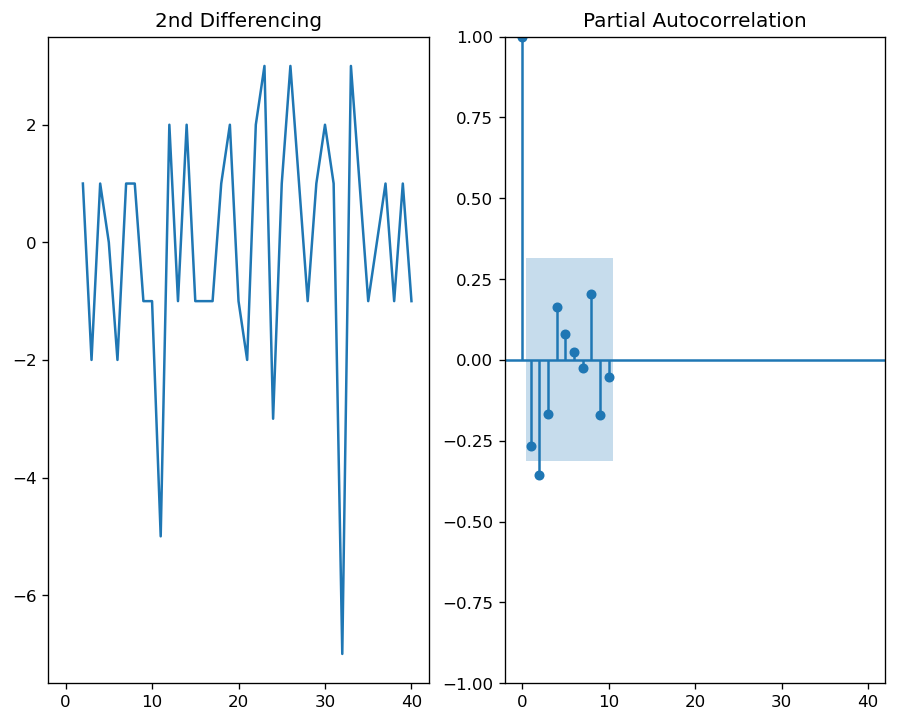

In [20]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().diff().dropna(), ax=axes[1], method='ywm', lags=10)
plt.show()

so,  p = 0.

#### Finding MA Term

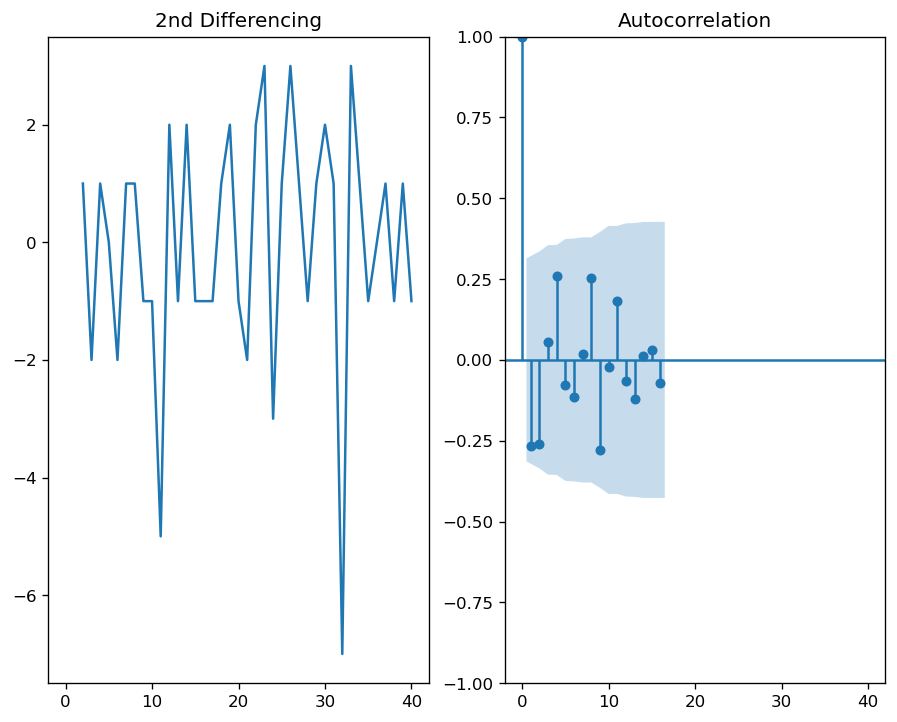

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().diff().dropna(), ax=axes[1])

plt.show()

i chose the MA term q = 0.

In [22]:
df.index = pd.date_range(start='1990', end='2031', freq='A')

In [23]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(0,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   41
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -83.465
Date:                Sun, 20 Nov 2022   AIC                            168.930
Time:                        04:29:10   BIC                            170.594
Sample:                    12-31-1990   HQIC                           169.527
                         - 12-31-2030                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.2307      0.676      6.257      0.000       2.905       5.556
Ljung-Box (L1) (Q):                   3.00   Jarque-Bera (JB):                14.58
Prob(Q):                              0.08   Pr

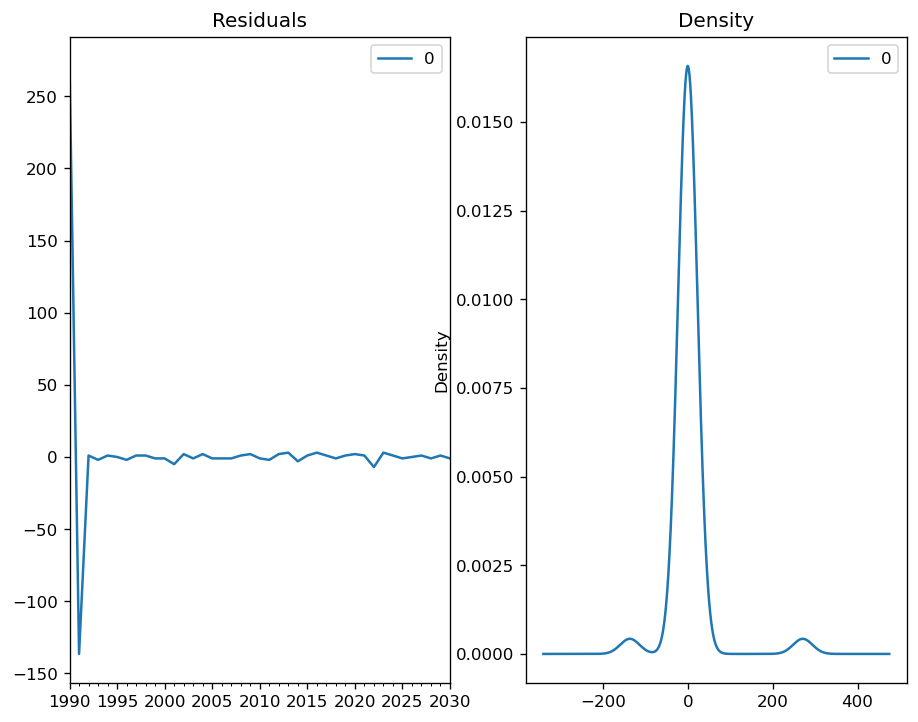

In [24]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

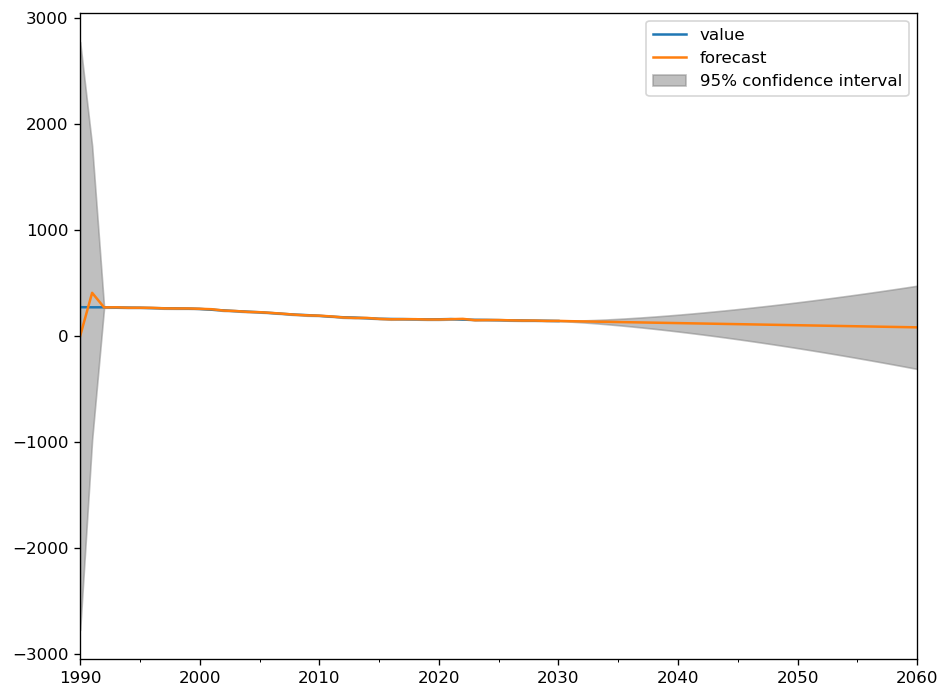

In [25]:
fig, ax = plt.subplots()
ax = df[["value"]].plot(ax=ax)
ge = plot_predict(model_fit, '1990', '2060', ax=ax)

plt.show()

In [26]:
forecast = model_fit.predict(start='2031', end='2070')
print(forecast)

2031-12-31    139.0
2032-12-31    137.0
2033-12-31    135.0
2034-12-31    133.0
2035-12-31    131.0
2036-12-31    129.0
2037-12-31    127.0
2038-12-31    125.0
2039-12-31    123.0
2040-12-31    121.0
2041-12-31    119.0
2042-12-31    117.0
2043-12-31    115.0
2044-12-31    113.0
2045-12-31    111.0
2046-12-31    109.0
2047-12-31    107.0
2048-12-31    105.0
2049-12-31    103.0
2050-12-31    101.0
2051-12-31     99.0
2052-12-31     97.0
2053-12-31     95.0
2054-12-31     93.0
2055-12-31     91.0
2056-12-31     89.0
2057-12-31     87.0
2058-12-31     85.0
2059-12-31     83.0
2060-12-31     81.0
2061-12-31     79.0
2062-12-31     77.0
2063-12-31     75.0
2064-12-31     73.0
2065-12-31     71.0
2066-12-31     69.0
2067-12-31     67.0
2068-12-31     65.0
2069-12-31     63.0
2070-12-31     61.0
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [27]:
%%capture
!jupyter nbconvert --to html --no-input --no-prompt forecast_maternal_mortality_rate.ipynb